In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [2]:
whale_returns_csv = Path("../resources_hw/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv)
whale_returns.sort_index()
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull()
whale_returns.head()
whale_returns.count()

Date                           1060
SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [4]:
# Determine percentage of nulls
whale_returns.isnull().mean() * 100

Date                           0.00000
SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [5]:
# Determine number of nulls
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
# YOUR CODE HERE
whale_returns = whale_returns.dropna().copy()
whale_returns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [7]:
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [8]:
whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True),inplace=True)
whale_returns.drop(columns=['Date'], inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [9]:
# Reading algorithmic returns
algo_returns_csv = Path("../resources_hw/algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv)
algo_returns.sort_index()
algo_returns.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [10]:
 # Count nulls
# YOUR CODE HERE
algo_returns.isnull()
algo_returns.count()
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [11]:
 # Drop nulls
# YOUR CODE HERE
algo_returns = algo_returns.dropna().copy()
algo_returns
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [12]:
algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format=True), inplace=True)
algo_returns.drop(columns=['Date'], inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [13]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../resources_hw/sp500_history.csv")
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv)
sp500_history.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [14]:
# Check Data Types
# YOUR CODE HERE

sp500_history.dtypes

Date     object
Close    object
dtype: object

In [15]:
# Fix Data Types
# YOUR CODE HERE
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"]

0       2933.68
1       2907.97
2       2905.03
3       2900.45
4       2907.06
         ...   
1644    1460.93
1645    1461.40
1646    1450.99
1647    1445.75
1648    1444.49
Name: Close, Length: 1649, dtype: object

In [16]:
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.head()
sp500_history.dtypes

Date      object
Close    float64
dtype: object

In [17]:
sp500_history.dtypes

Date      object
Close    float64
dtype: object

In [18]:
# Calculate Daily Returns
# YOUR CODE HERE

sp500_history.set_index(pd.to_datetime(sp500_history['Date'], infer_datetime_format=True), inplace=True)
sp500_history.drop(columns=['Date'], inplace=True)
sp500_history.sort_index(inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [19]:
sp500_history = sp500_history.pct_change()

sp500_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [20]:
# Drop nulls
# YOUR CODE HERE
sp500_history = sp500_history.dropna().copy()
sp500_history

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [21]:
sp500_history.isnull()
sp500_history.count()
sp500_history.isnull().sum()

Close    0
dtype: int64

In [22]:
# Rename Column
# YOUR CODE HERE
sp500_history = sp500_history.rename(columns={
    "Close": "S&P 500",
})

sp500_history.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [23]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

combined_df = pd.concat([whale_returns,algo_returns,sp500_history], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


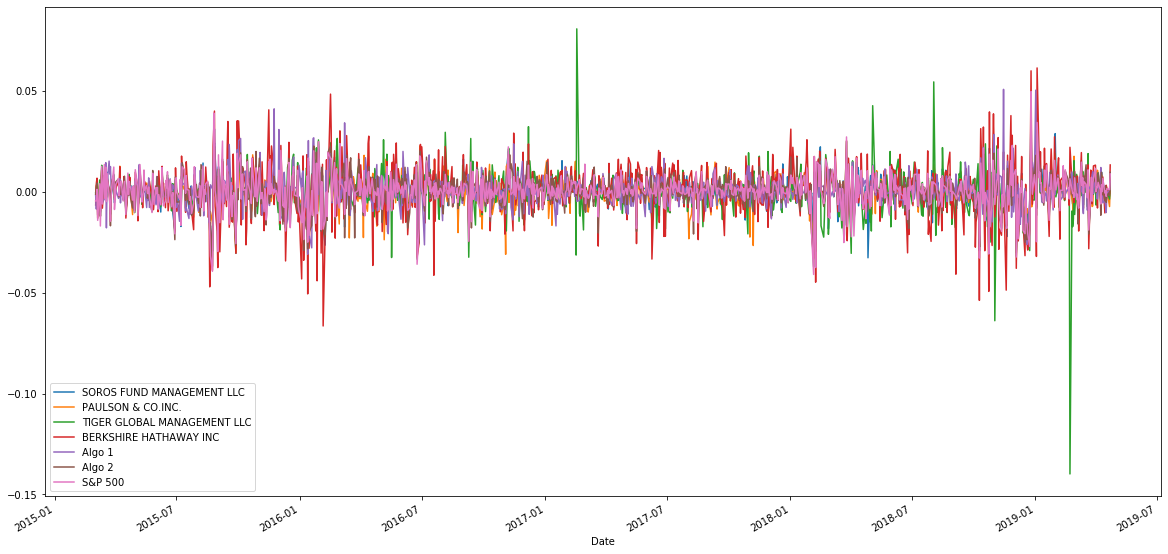

In [24]:
#Portfolio Analysis
## Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=(20,10))

In [25]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


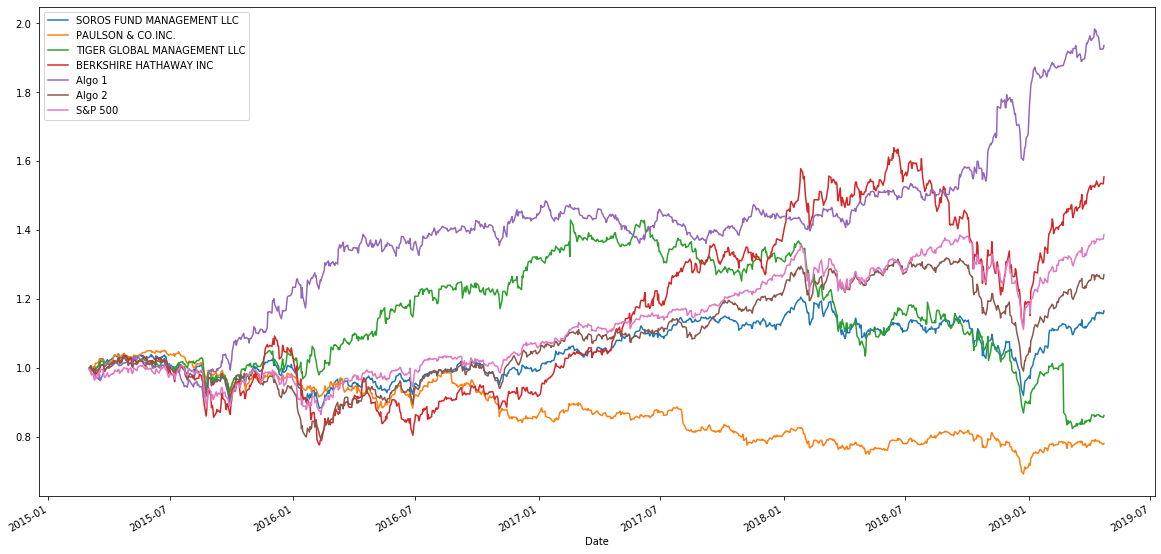

In [26]:
cumulative_returns.plot(figsize=(20,10))

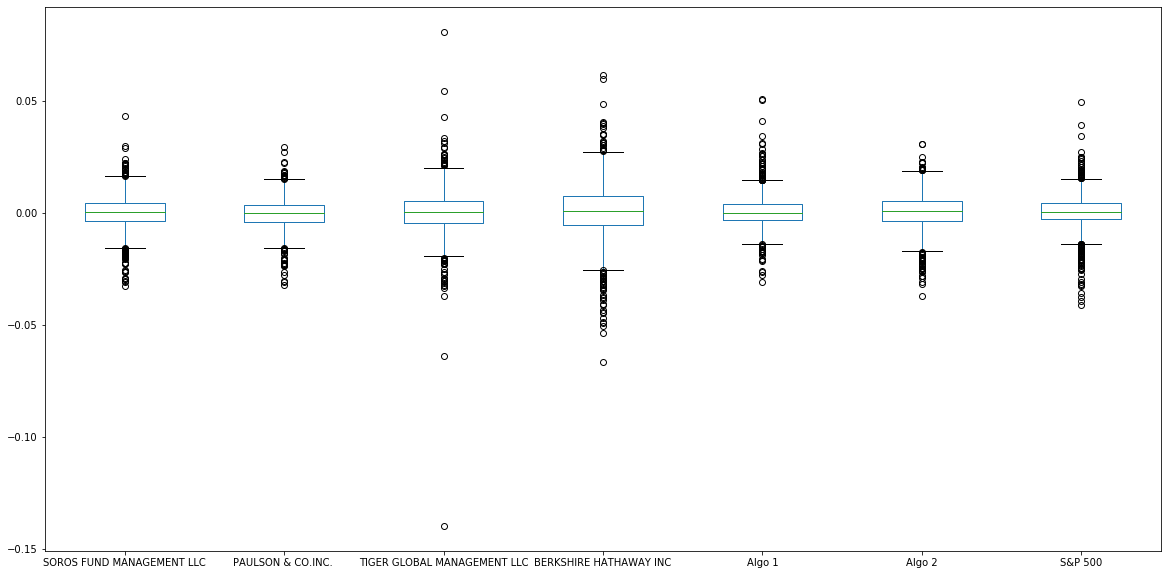

In [27]:
# Risk
# Box plot to visually show risk
# YOUR CODE HERE
combined_df.plot.box(figsize=(20,10))

In [28]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_df.std()
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [29]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
daily_std > 0.008554

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [30]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
combined_std_annual = combined_df.std() * np.sqrt(252)
combined_std_annual

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

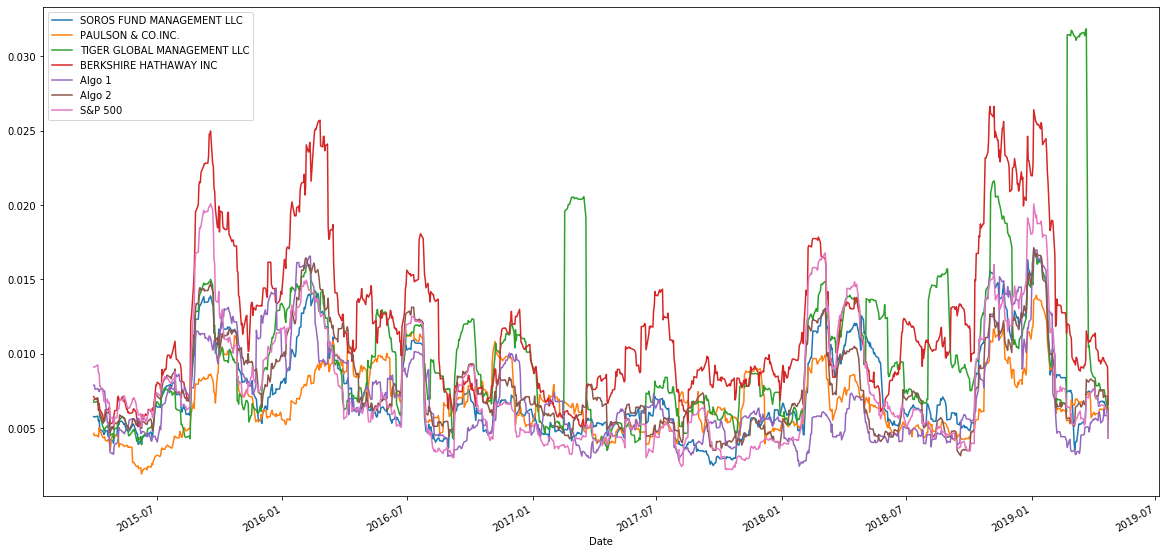

In [31]:
# Rolling Statistics
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_df.rolling(window=21).std().plot(figsize=(20,10))

In [32]:
# Construct a correlation table
# YOUR CODE HERE
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [33]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
covariance = combined_df['Algo 1'].cov(combined_df['S&P 500'])
covariance

1.8217749991632826e-05

In [34]:
# Calculate variance of all daily returns of Algo 1 vs. S&P 500
variance = combined_df['S&P 500'].var()
variance

7.316632424648712e-05

In [35]:
# Calculate beta of all daily returns of Algo 1
algo_1_beta = covariance / variance
algo_1_beta

0.24899091459425748

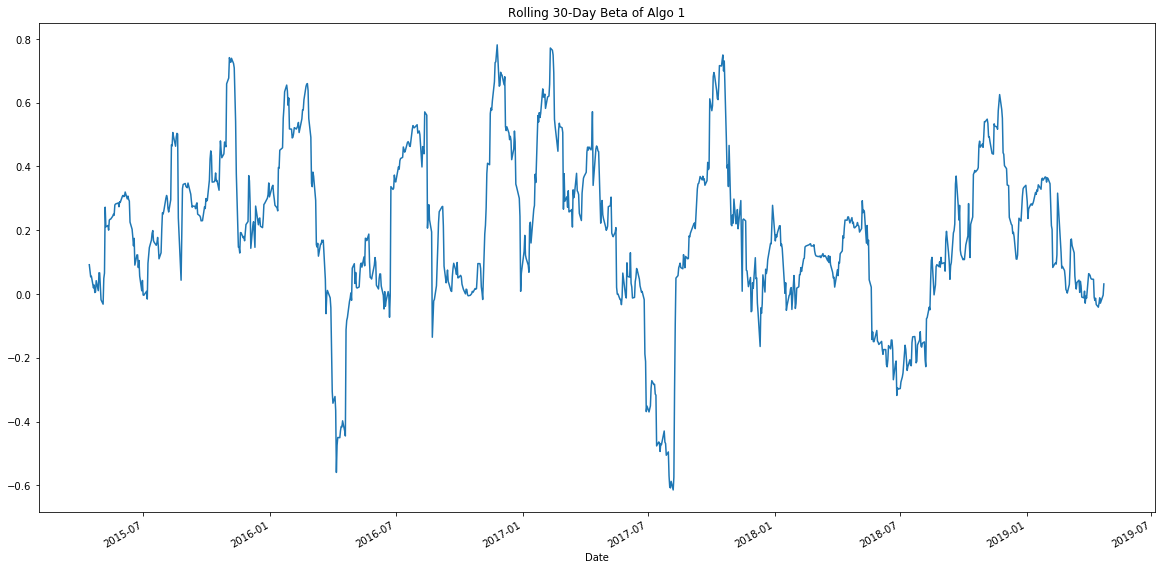

In [36]:
# Calculate 30-day rolling beta of AMZN and plot the data
rolling_covariance = combined_df['Algo 1'].rolling(window=30).cov(combined_df['S&P 500'])
rolling_variance = combined_df['S&P 500'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 1')

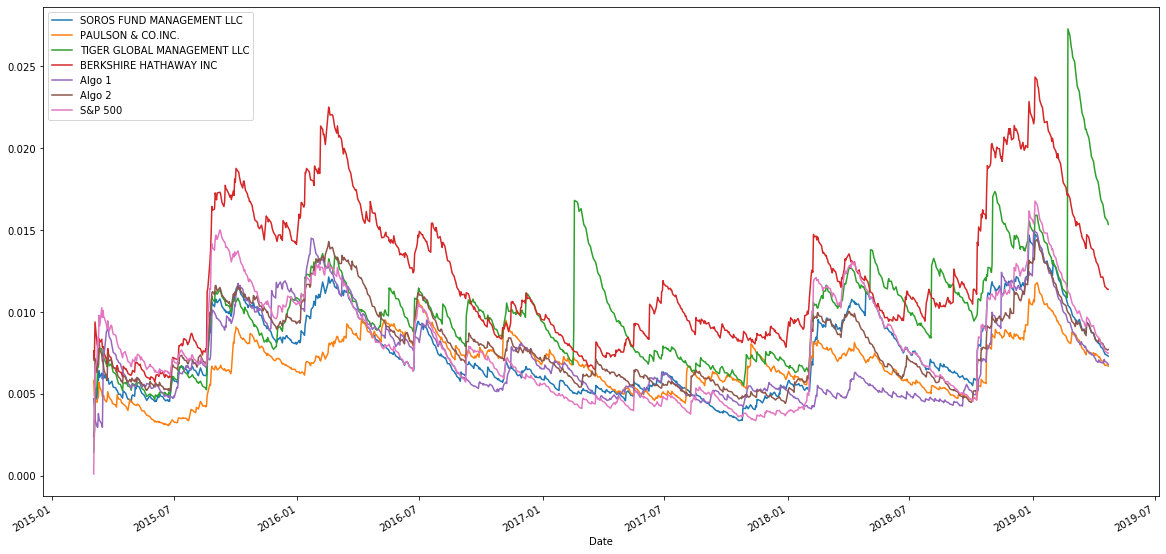

In [37]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE


combined_df.ewm(halflife=21).std().plot(figsize=(20,10))                                    

In [38]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

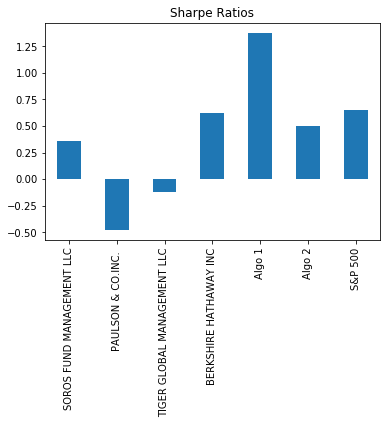

In [39]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [40]:
#Portfolio Returns
goog_historical_csv = Path("../resources_hw/goog_historical.csv")
goog_historical = pd.read_csv(goog_historical_csv,index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_historical.sort_index(inplace=True)
goog_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [41]:
aapl_historical_csv = Path("../resources_hw/aapl_historical.csv")
aapl_historical = pd.read_csv(aapl_historical_csv,index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_historical.sort_index(inplace=True)
aapl_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [42]:
cost_historical_csv = Path("../resources_hw/cost_historical.csv")
cost_historical = cost_historical = pd.read_csv(cost_historical_csv,index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_historical.sort_index(inplace=True)
cost_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [43]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

joined_data_cols = pd.concat([goog_historical, aapl_historical, cost_historical], axis='rows', join='inner') 
joined_data_cols = joined_data_cols.reset_index()
joined_data_cols = joined_data_cols.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
joined_data_cols.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [44]:
# Drop Nulls
# YOUR CODE HERE
joined_data_cols = joined_data_cols.dropna().copy()
joined_data_cols
joined_data_cols.isnull().sum()

Symbol
AAPL    0
COST    0
GOOG    0
dtype: int64

In [45]:
# Calculate weighted portfolio returns
all_returns = joined_data_cols.pct_change()
all_returns = all_returns.dropna().copy()
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

all_returns["Custom"] = all_returns.dot(weights)
all_returns = all_returns.drop(columns=["AAPL","COST","GOOG"])
all_returns.head()

Symbol,Custom
Trade DATE,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061


In [46]:
all_returns.head()

Symbol,Custom
Trade DATE,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061


In [47]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

In [48]:
combined_df_final = pd.concat([combined_df,all_returns], axis='columns', join='inner') 
combined_df_final.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [49]:
#Re-run the performance and risk analysis with your portfolio to see how it compares to the others
volatility = combined_df_final.std() * np.sqrt(252)
volatility



SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

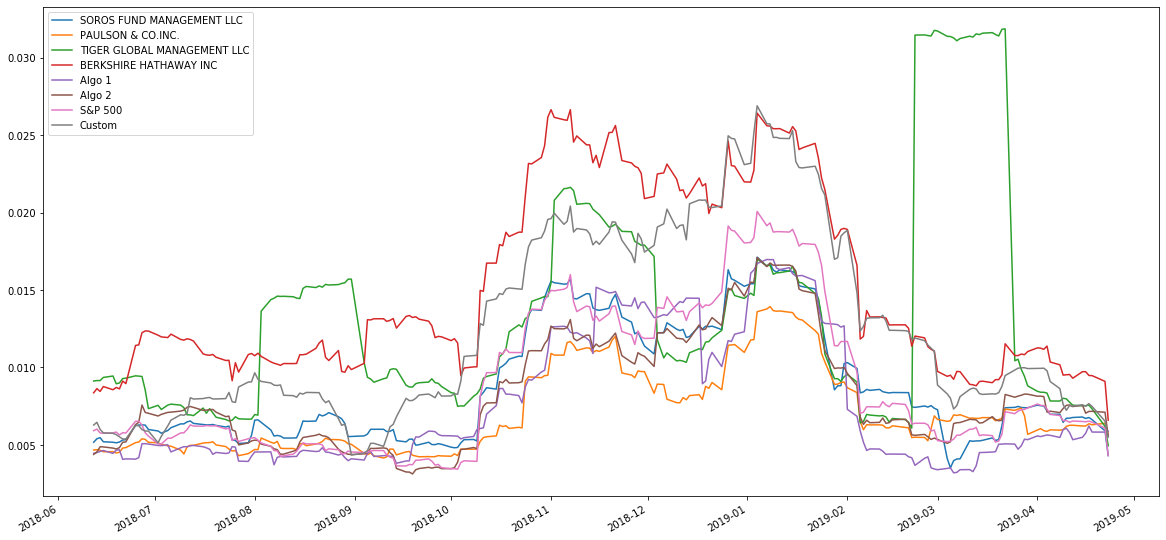

In [50]:
combined_df_final.rolling(window=21).std().plot(figsize=(20,10))

In [51]:
sharpe_ratios_final = (combined_df_final.mean() * 252) / (combined_df_final.std() * np.sqrt(252))
sharpe_ratios_final

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

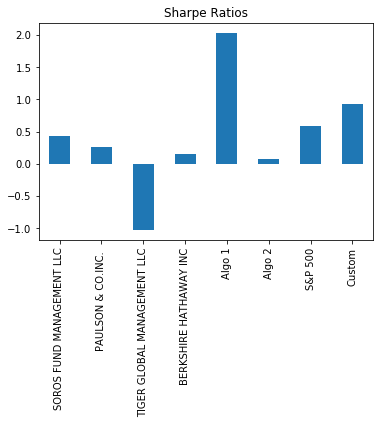

In [52]:
sharpe_ratios_final.plot(kind="bar", title="Sharpe Ratios")

In [53]:
# Create a correlation analysis
# YOUR CODE HERE
correlation_2 = combined_df_final.corr()
correlation_2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


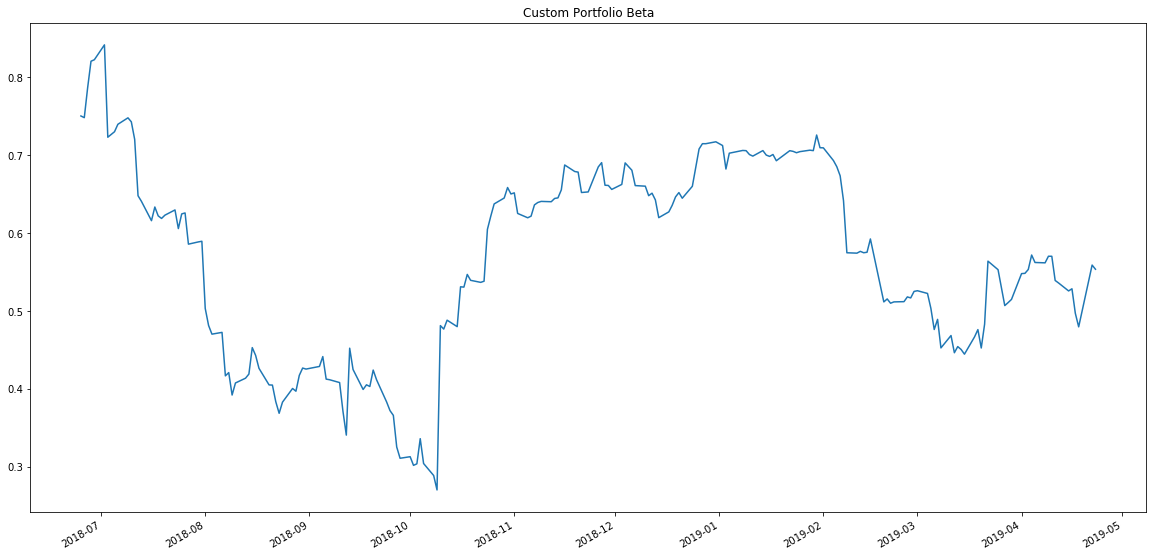

In [54]:
# Beta
# YOUR CODE HERE
rolling_covariance_final = combined_df_final['Custom'].rolling(window=30).cov(combined_df_final['S&P 500'])
rolling_variance_final = combined_df_final['Custom'].rolling(window=30).var()
rolling_beta_final = rolling_covariance_final / rolling_variance_final
rolling_beta_final.plot(figsize=(20, 10), title='Custom Portfolio Beta')